## Classification of Imbalanced Data

In [69]:
# Imports
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Plot params
mpl.rcParams['figure.figsize'] = (18, 12)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
# Gather credi card fraud data
file = tf.keras.utils
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Look at the data metrics
raw_df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].describe()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Look at the data imbalance
neg, pos = np.bincount(raw_df['Class'])
total = neg + pos
print(f'Total: {total} \n Positive: {pos} ({pos/total * 100}%) \n Negative: {neg}' )

Total: 284807 
 Positive: 492 (0.1727485630620034%) 
 Negative: 284315


In [11]:
# Clean, Split (Train/Val/Test), and Normalise data
cleaned_df = raw_df.copy()
# Drop time column as it doesn't have much use
cleaned_df.pop('Time')
# Convert amount column to logarithmic
eps=0.001
cleaned_df['Log_Amount'] = np.log(cleaned_df.pop('Amount') + eps)

# Split into DataSets
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Create arrays of labels and features
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0

val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

# Normalise using standar scaler
# Use the train set to specify the amounts to scale each feature by
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
# Apply the train scaling to val and test, thus the scaling isn't aware of the data in these
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


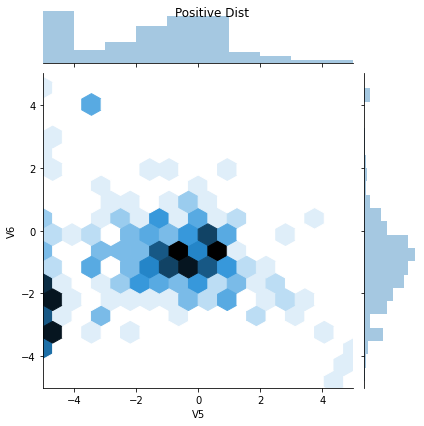

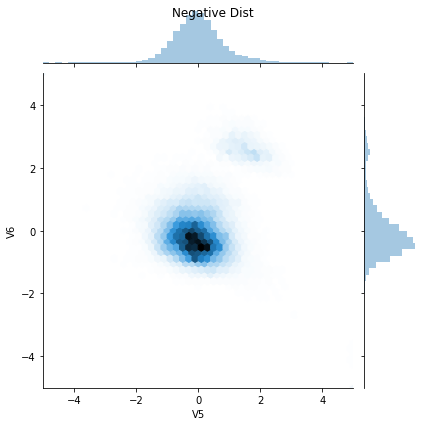

In [14]:
# Look at the distribution of the training data using seaborn
pos_df = pd.DataFrame(train_features[bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(pos_df['V5'], pos_df['V6'], kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive Dist")

sns.jointplot(neg_df['V5'], neg_df['V6'], kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative Dist")

## Define a Simple Dense Model

In [15]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    
    model = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(lr=1e-3),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics
    )
    
    return model

### Useful Metrics in Unbalanced Data

- **False Negatives** and **False Positives** represent classes that were incorrectly predicted.
- **True Negatives** and **True Positives** represent classes that were correctly predicted.
- **Accuracy** is the % of examples correctly classified (correct / total), in unbalanced data this isn't very useful
- **Precision** is the percentage of **predicted** positives that were correctly predicted (true positives / true positives + false positives)
- **Recall** is the percentage of **actual** positives predicted (true positives / true positives + false negatives)
- **AUC** is the Area Under The Curve of a Reciever Operating Characteristic curve (ROC-AUC). This equivalent to the probability that a classifier will rank a random positive sample higher than a random negative sample.

In [17]:
# BUild the baseline model
EPOCHS=100
BATCH_SIZE=2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True
)

model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [19]:
#test run the untrained model
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

model.predict(train_features[:10])

Loss: 1.5299


array([[0.8430182 ],
       [0.79188585],
       [0.45958585],
       [0.8988744 ],
       [0.21910846],
       [0.71115845],
       [0.6799633 ],
       [0.8520398 ],
       [0.65956235],
       [0.8965634 ]], dtype=float32)

We can see that the initial weights and intitial loss is very bad, this is because the initial bias is randomly assigned so the model has to spend the first few epochs learning that positives are rare.

We can prempt this using a simple equation from (http://karpathy.github.io/2019/04/25/recipe/#2-set-up-the-end-to-end-trainingevaluation-skeleton--get-dumb-baselines):

$b_0 = log_e (pos/neg)$

In [20]:
initial_bias = np.log([pos/neg])
initial_bias

array([-6.35935934])

In [22]:
model = make_model(output_bias = initial_bias)
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

model.predict(train_features[:10])
# Gives a much better initial loss

Loss: 0.0177


array([[0.00254923],
       [0.00166315],
       [0.0023098 ],
       [0.00247607],
       [0.00041378],
       [0.00141928],
       [0.00113776],
       [0.00338912],
       [0.00274962],
       [0.00113371]], dtype=float32)

In [23]:
# To keep the training runs comparable save initial models weights for later use
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)

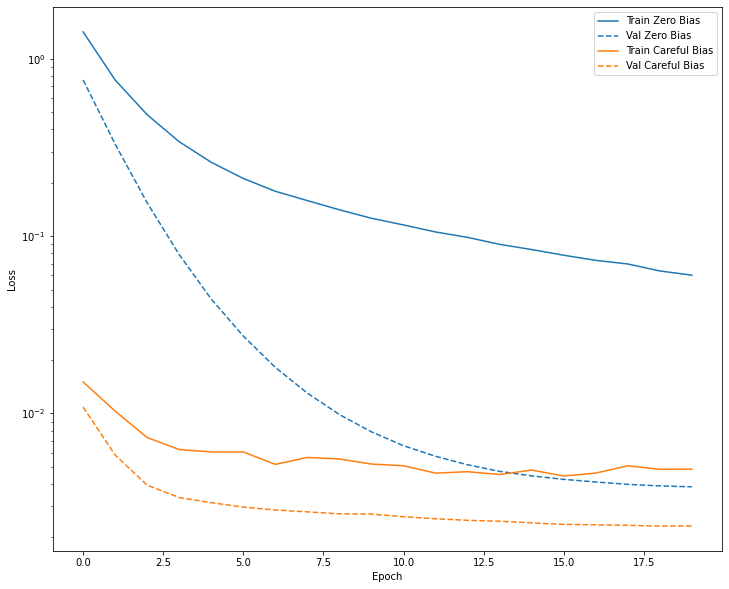

In [31]:
# for peace of mind train the model with/without initial bias to show it actually helped
model = make_model()
# model.load_weights(initial_weights)
# model.layers[-1].bias.assign([0.0]) # Uses the same initial weights but without the output bias
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=0
)

model = make_model(output_bias=initial_bias)
# model.load_weights(initial_weights) # This is the equivalent of loading with an initial bias, just stops small fluctuation from the first run
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=0
)

def plot_loss(history, label, n):
    # Use a log scale to show the wide range of values.
    plt.semilogy(history.epoch,  history.history['loss'],
                   color=colors[n], label='Train '+label)
    plt.semilogy(history.epoch,  history.history['val_loss'],
                  color=colors[n], label='Val '+label, linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend() 

    
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

# We can clearly see that careful initialisation is helpful for minimising validation loss

### Train The Model

In [32]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels)
)

Epoch 1/100
90/90 [==============================] - 1s 15ms/step - loss: 0.0146 - tp: 73.0000 - fp: 67.0000 - tn: 227383.0000 - fn: 322.0000 - accuracy: 0.9983 - precision: 0.5214 - recall: 0.1848 - auc: 0.7019 - val_loss: 0.0075 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45498.0000 - val_fn: 71.0000 - val_accuracy: 0.9984 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8704
Epoch 2/100
90/90 [==============================] - 1s 9ms/step - loss: 0.0089 - tp: 82.0000 - fp: 28.0000 - tn: 181924.0000 - fn: 242.0000 - accuracy: 0.9985 - precision: 0.7455 - recall: 0.2531 - auc: 0.8160 - val_loss: 0.0050 - val_tp: 36.0000 - val_fp: 3.0000 - val_tn: 45495.0000 - val_fn: 35.0000 - val_accuracy: 0.9992 - val_precision: 0.9231 - val_recall: 0.5070 - val_auc: 0.8869
Epoch 3/100
90/90 [==============================] - 1s 9ms/step - loss: 0.0068 - tp: 128.0000 - fp: 19.0000 - tn: 181933.0000 - fn: 196.0000 - accuracy: 0.9988 - precision: 0.8707 - recall: 0.3951 - auc:

Epoch 22/100
90/90 [==============================] - 1s 10ms/step - loss: 0.0041 - tp: 208.0000 - fp: 32.0000 - tn: 181920.0000 - fn: 116.0000 - accuracy: 0.9992 - precision: 0.8667 - recall: 0.6420 - auc: 0.9250 - val_loss: 0.0023 - val_tp: 55.0000 - val_fp: 4.0000 - val_tn: 45494.0000 - val_fn: 16.0000 - val_accuracy: 0.9996 - val_precision: 0.9322 - val_recall: 0.7746 - val_auc: 0.9364
Epoch 23/100
90/90 [==============================] - 1s 10ms/step - loss: 0.0043 - tp: 200.0000 - fp: 38.0000 - tn: 181914.0000 - fn: 124.0000 - accuracy: 0.9991 - precision: 0.8403 - recall: 0.6173 - auc: 0.9281 - val_loss: 0.0023 - val_tp: 55.0000 - val_fp: 3.0000 - val_tn: 45495.0000 - val_fn: 16.0000 - val_accuracy: 0.9996 - val_precision: 0.9483 - val_recall: 0.7746 - val_auc: 0.9364
Epoch 24/100
90/90 [==============================] - 1s 10ms/step - loss: 0.0042 - tp: 202.0000 - fp: 33.0000 - tn: 181919.0000 - fn: 122.0000 - accuracy: 0.9991 - precision: 0.8596 - recall: 0.6235 - auc: 0.9235 

### Plot Baseline Metrics

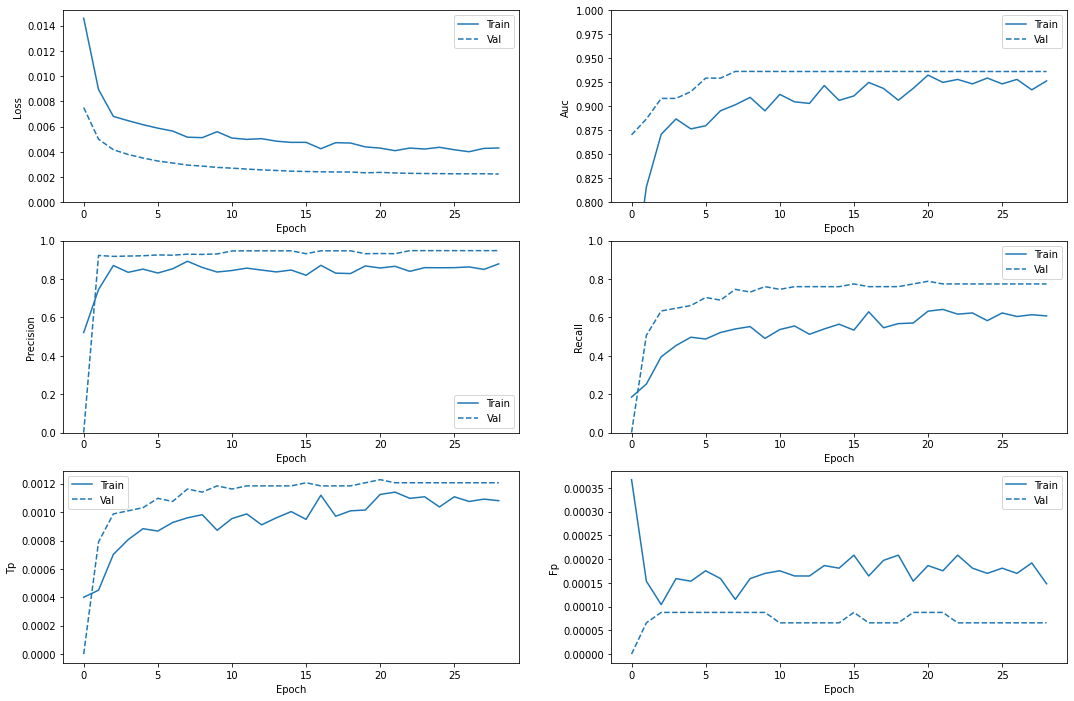

In [64]:
def plot_metrics(history):
    metrics = ['loss', 'auc', 'precision', 'recall', 'tp', 'fp']
    plt.figure(figsize=(18, len(metrics) * 2))
    for n, metric in enumerate(metrics):
        name = metric.replace("_", " ").capitalize()
        plt.subplot(len(metrics)/2, 2, n+1)
        if metric in ['tp', 'fp', 'tn', 'fn']:
            plt.plot(history.epoch, np.array(history.history[metric]) / train_features.shape[0], color=colors[0], label='Train')
            plt.plot(history.epoch, np.array(history.history['val_' + metric]) / val_features.shape[0], color=colors[0], ls='--', label='Val')
        else:
            plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
            plt.plot(history.epoch, history.history['val_' + metric], color=colors[0], ls='--', label='Val')
                  
            if metric == 'loss':
                plt.ylim([0, plt.ylim()[1]])
            elif metric == 'auc':
                plt.ylim([0.8,1])
            else:
                plt.ylim([0,1])
            
        plt.xlabel('Epoch')
        plt.ylabel(name)
        
        plt.legend()

plot_metrics(baseline_history)

loss : 0.0037765533197671175

tp : 68.0

fp : 16.0

tn : 56849.0

fn : 29.0

accuracy : 0.999210000038147

precision : 0.8095238208770752

recall : 0.7010309100151062

auc : 0.9172238111495972

Legitimate Transactions Detected (True Negatives):  56849
Legitimate Transactions Incorrectly Detected (False Positives):  16
Fraudulent Transactions Missed (False Negatives):  29
Fraudulent Transactions Detected (True Positives):  68
Total Fraudulent Transactions:  97


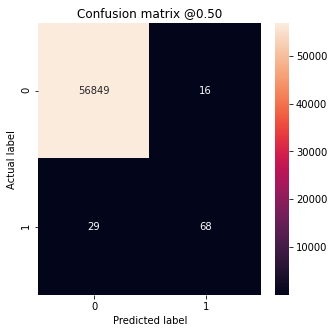

In [72]:
# Generate a confusion matrix
train_pred_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_pred_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))
    
baseline_results = model.evaluate(test_features, test_labels, batch_size=BATCH_SIZE, verbose=0)

for name, value in zip(model.metrics_names, baseline_results):
    print(name, ':', value)
    print()
    
plot_cm(test_labels, test_pred_baseline)

Confusion matrix shows how well the model does, ideally it would be diagonal with no false negatives/positives

For the problem of credit card fraud its actually preferrable to increase the umber of false positives, in order to to catch all the positives.

False Negatives in this instance are bad because it meand fraud gets through

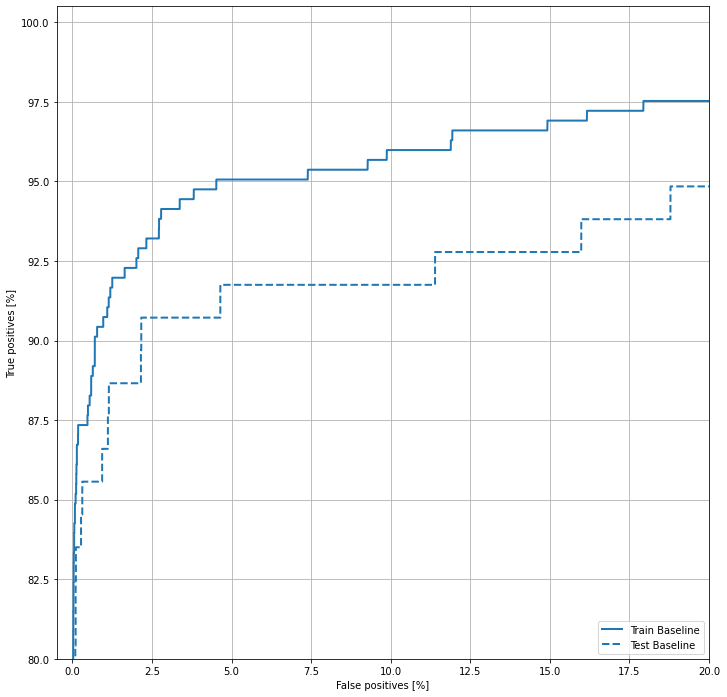

In [66]:
# ROC plot, this quickly shows how performant the model can be just by tuning the output threshold

def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
    
    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,20])
    plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')
    
plot_roc("Train Baseline", train_labels, train_pred_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_pred_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

The precision is fairly high, but the recall and ROC aren't as high as we would like for this problem

## Class Weights

### Calculate Class Weights

We can heavily weight the positive samples so the NN pays more attention to them

In [67]:
weight_for_0 = (1 / neg) * (total)/2
weight_for_1 = (1 / pos) * (total)/2

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 289.44


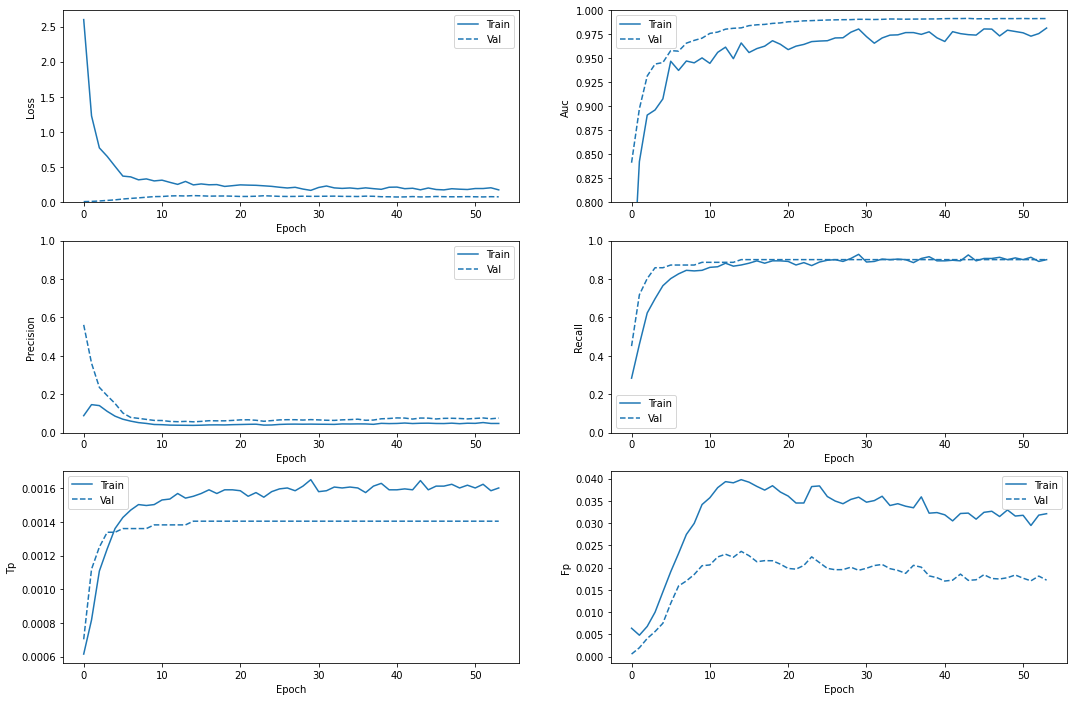

In [70]:
# Train a weighted model
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels),
    class_weight=class_weight
) 

IPython.display.clear_output()
plot_metrics(weighted_history)

loss :  0.08167186379432678

tp :  86.0

fp :  916.0

tn :  55949.0

fn :  11.0

accuracy :  0.9837259650230408

precision :  0.08582834154367447

recall :  0.8865979313850403

auc :  0.9681249856948853

Legitimate Transactions Detected (True Negatives):  55949
Legitimate Transactions Incorrectly Detected (False Positives):  916
Fraudulent Transactions Missed (False Negatives):  11
Fraudulent Transactions Detected (True Positives):  86
Total Fraudulent Transactions:  97


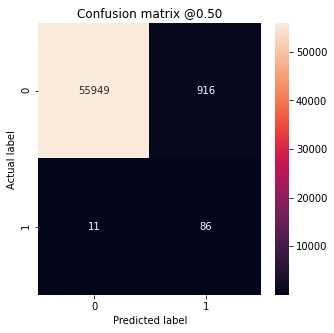

In [73]:
train_pred_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_pred_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
    print(name, ': ', value)
    print()

plot_cm(test_labels, test_pred_weighted)

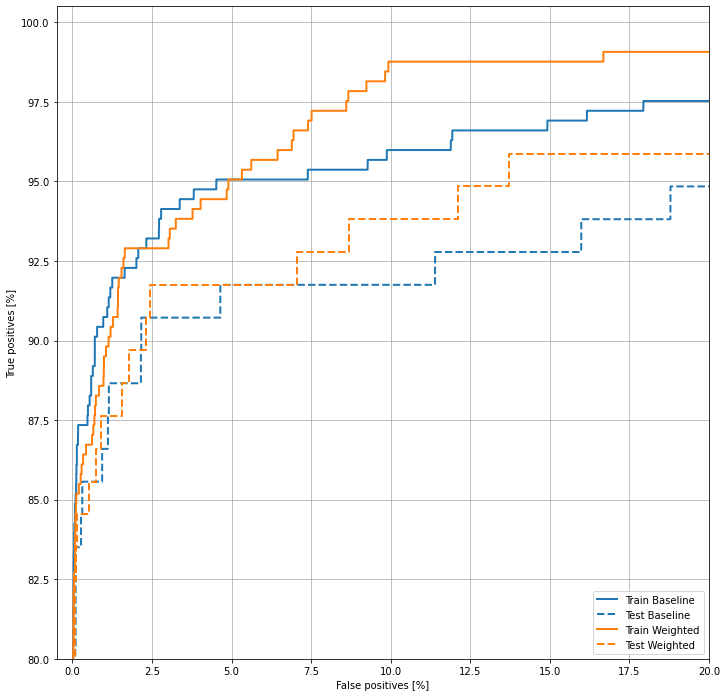

In [74]:
plot_roc("Train Baseline", train_labels, train_pred_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_pred_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_pred_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_pred_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

We can see that weighting the positive class has reduced the accuracy and the precision, but it has increased the recall and the ROC, which is good in this instance because we are aiming to reduce false negatives

## Oversampling
### Oversample the positive class

A similar approach would be to randomly over sample the minority class, creating fake positive data

In [75]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

### Using Numpy
we can randomly resample the positive data using the size of the negatives

In [77]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(181952, 29)

In [79]:
resample_features = np.concatenate([res_pos_features, neg_features], axis=0)
resample_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resample_labels))
np.random.shuffle(order)
resample_features = resample_features[order]
resample_labels = resample_labels[order]

resample_features.shape

(363904, 29)

## Using tf.data

In [81]:
BUFFER_SIZE=100000

def make_ds(features, labels):
    ds = tf.data.Dataset.from_tensor_slices((features, labels))
    ds = ds.shuffle(BUFFER_SIZE).repeat()
    return ds

# Each DS provides (feature, label) pairs
pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5,0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

for features, label in resampled_ds.take(1):
    print(label.numpy().mean())

0.47021484375


In [82]:
# we need a steps per epoch. Lets use the number of steps required to see each negative example once:
resampled_steps_per_epoch = np.ceil(2*neg / BATCH_SIZE)
resampled_steps_per_epoch
# This is kind of near to the weighting value, so we're basically repeating each positive value 270ish times.
# Has the same effect as weighting each value by 270 

278.0

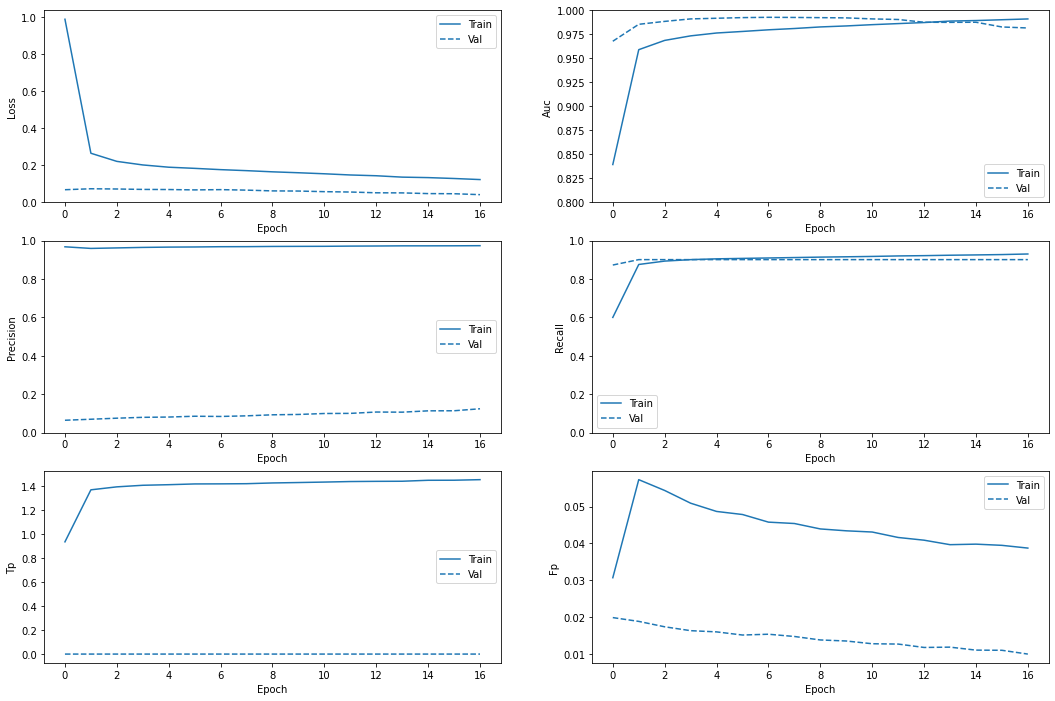

In [86]:
# Train this model
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels))
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2)

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks= [early_stopping],
    validation_data=val_ds
)

IPython.display.clear_output()
plot_metrics(resampled_history)

loss :  0.07528400421142578

tp :  86.0

fp :  849.0

tn :  56016.0

fn :  11.0

accuracy :  0.9849022030830383

precision :  0.09197860956192017

recall :  0.8865979313850403

auc :  0.9671454429626465

Legitimate Transactions Detected (True Negatives):  56016
Legitimate Transactions Incorrectly Detected (False Positives):  849
Fraudulent Transactions Missed (False Negatives):  11
Fraudulent Transactions Detected (True Positives):  86
Total Fraudulent Transactions:  97


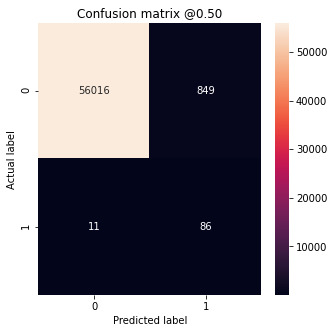

In [87]:
train_pred_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_pred_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

resampled_results = resampled_model.evaluate(test_features, test_labels, batch_size=BATCH_SIZE, verbose=0)

for name, value in zip(resampled_model.metrics_names, resampled_results):
    print(name, ': ', value)
    print()

plot_cm(test_labels, test_pred_resampled)

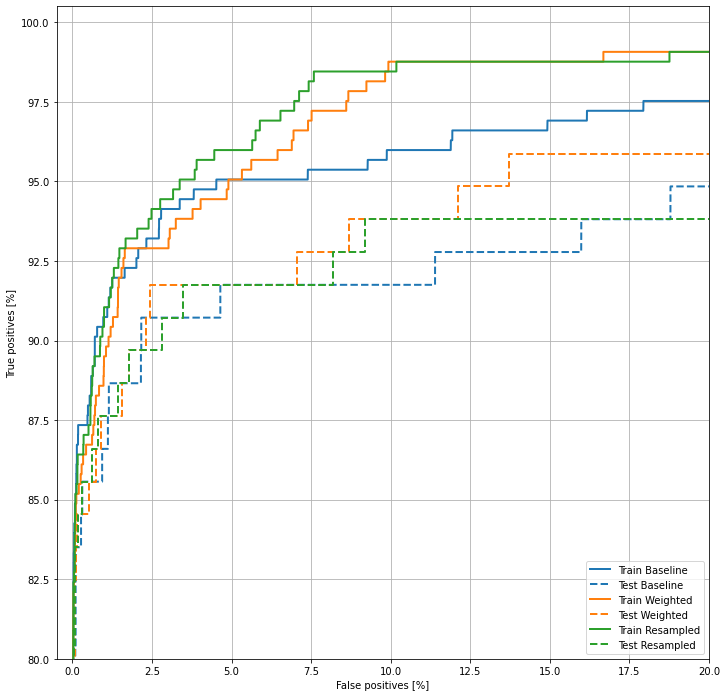

In [88]:
plot_roc("Train Baseline", train_labels, train_pred_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_pred_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_pred_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_pred_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_pred_resampled,  color=colors[2])
plot_roc("Test Resampled", test_labels, test_pred_resampled,  color=colors[2], linestyle='--')
plt.legend(loc='lower right')

In this instance resampling the data hasn't improved the validation ROC/Recall when compared to the class weighting